In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

%matplotlib inline

In [2]:
# data = pd.read_csv('data/Heart Attack Data Set.csv')
# index_dropped_rows=[]

In [3]:
from google.colab import drive
drive.mount("/content/gdrive", force_remount=True)

Mounted at /content/gdrive


In [4]:
cd gdrive/Shareddrives/Proyecto\ NLP/final_project/

/content/gdrive/Shareddrives/Proyecto NLP/final_project


In [5]:
data = pd.read_csv('Heart Attack Data Set.csv')
index_dropped_rows=[]

In [6]:
print(data.columns.tolist())

['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']


In [7]:
display(data)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


# Análisis de Datos

## Sex

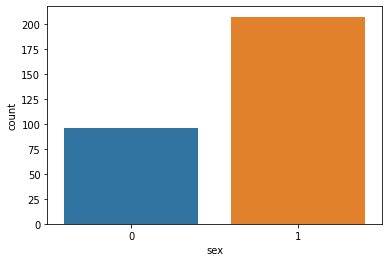

In [9]:
sns.countplot(data=data,x='sex')
plt.show()

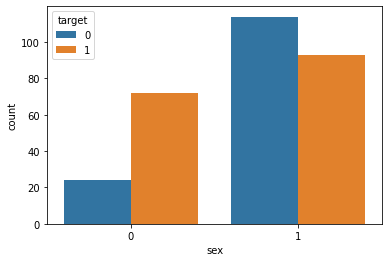

In [10]:
sns.countplot(data=data,x='sex',hue='target')

## Age

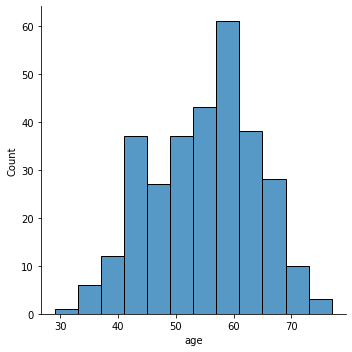

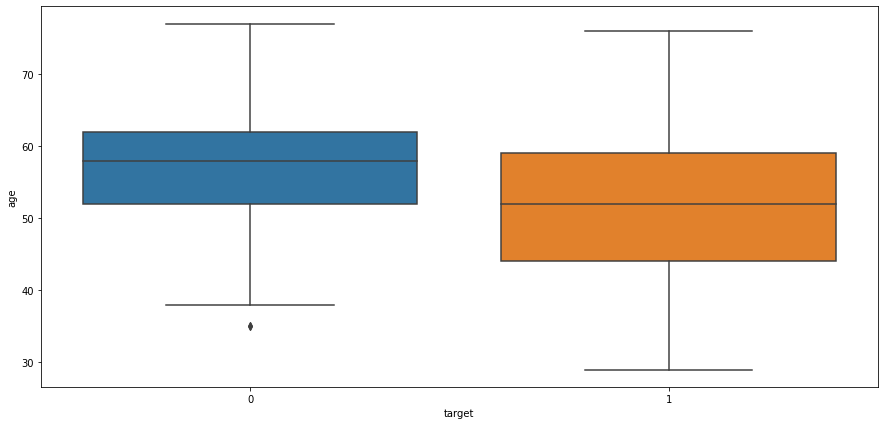

In [11]:
data['age'].nunique()
sns.displot(data['age'])
plt.figure(figsize=(15,7))
sns.boxplot(data=data,x='target',y='age')

## Chest Pain type 
1: typical angina (all criteria present)
2: atypical angina (two of three criteria satisfied)  
3: non-anginal pain (less than one criteria satisfied) 
4: asymptomatic (none of the criteria are satisfied)

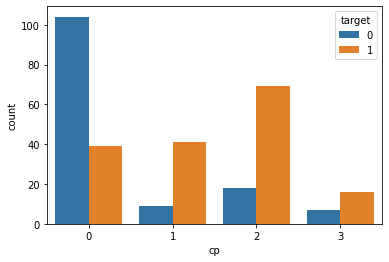

In [12]:
sns.countplot(data=data,x='cp',hue='target')

## Resting Blood pressure 
(in mmHg, upon admission to the hospital)

2


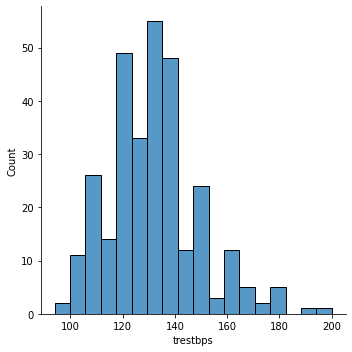

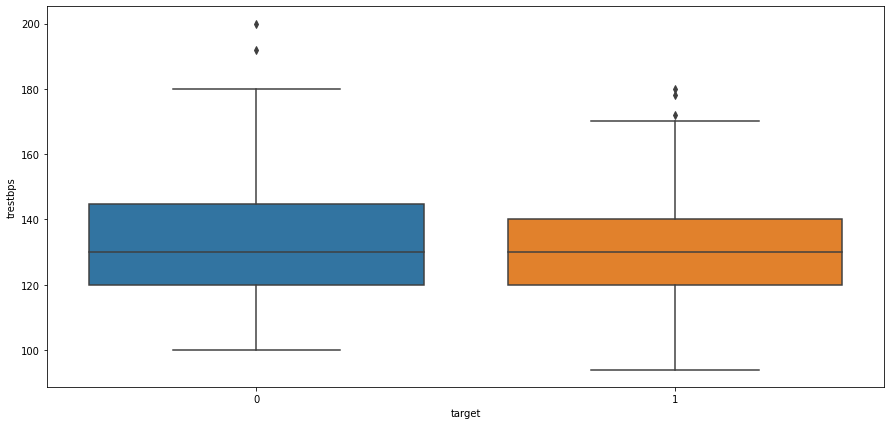

In [13]:
data['trestbps'].nunique()
sns.displot(data['trestbps'])
plt.figure(figsize=(15,7))
sns.boxplot(data=data,x='target',y='trestbps')


print(len(data[data['trestbps']>180]))

In [14]:
data[data['trestbps']>180]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
223,56,0,0,200,288,1,0,133,1,4.0,0,2,3,0
248,54,1,1,192,283,0,0,195,0,0.0,2,1,3,0


In [15]:
remove_data=data.index[data['trestbps']>180].tolist()
index_dropped_rows.extend(remove_data)
index_dropped_rows

[223, 248]

## Cholesterol
Serum cholesterol in mg/dL

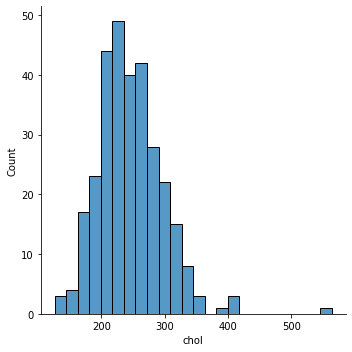

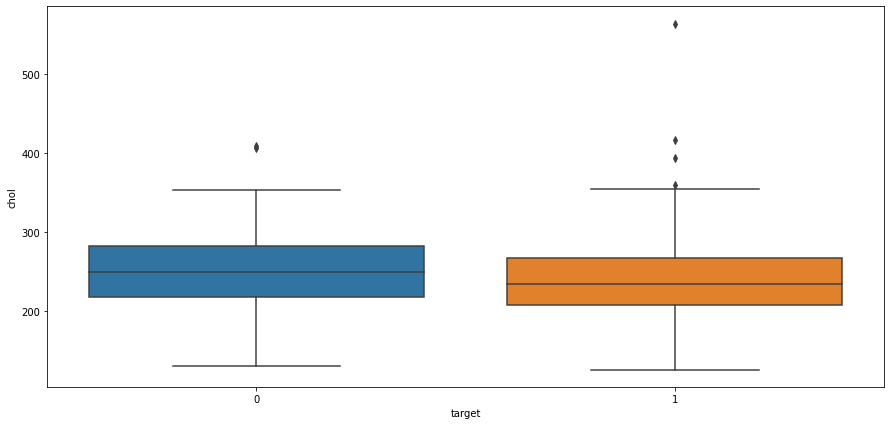

In [16]:
data['chol'].nunique()
sns.displot(data['chol'])
plt.figure(figsize=(15,7))
sns.boxplot(data=data,x='target',y='chol')

In [17]:
data[data['chol']>500]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
85,67,0,2,115,564,0,0,160,0,1.6,1,0,3,1


In [18]:
remove_data=data.index[data['chol']>500].tolist()
for i in remove_data:
  index_dropped_rows.append(i)

## Fasting Blood Sugar 
Above 120 mg/dL (likely to be diabetic) 
1 = true; 0 = false

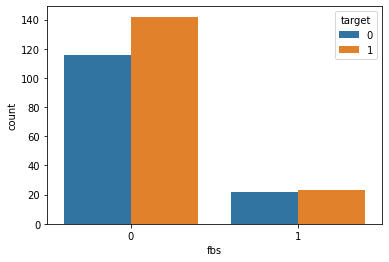

In [19]:
sns.countplot(data=data,x='fbs',hue='target')

## RestECG
Resting electrocardiogram results -- 
Value 0: normal
Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria 

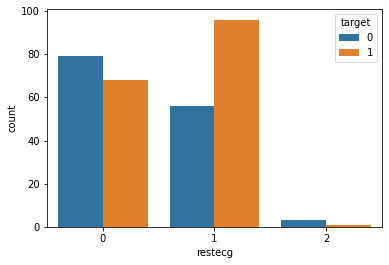

In [20]:
sns.countplot(data=data,x='restecg',hue='target')

## MaxHR 
Greatest number of beats per minute your heart can possibly reach during all-out strenuous exercise. 

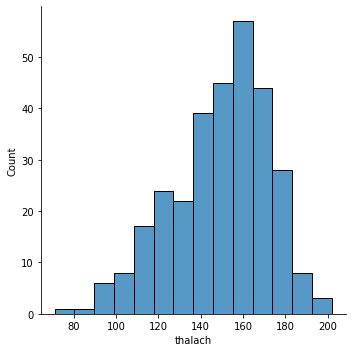

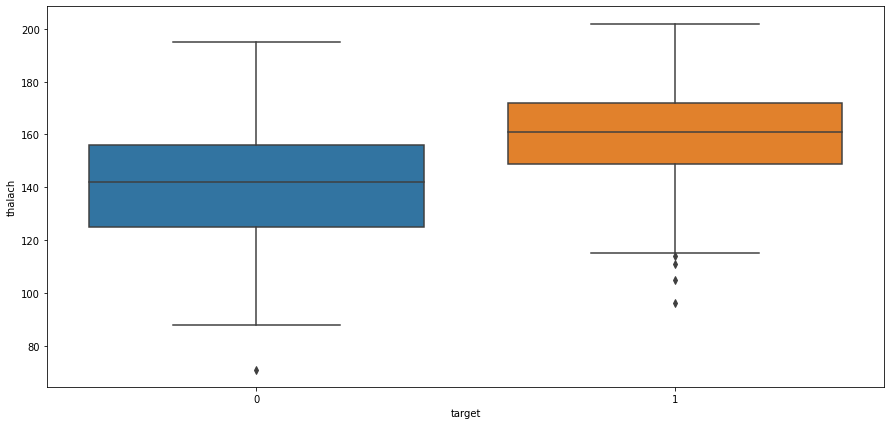

In [21]:
data['thalach'].nunique()
sns.displot(data['thalach'])
plt.figure(figsize=(15,7))
sns.boxplot(data=data,x='target',y='thalach')

In [22]:
data[data['thalach']<80]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
272,67,1,0,120,237,0,1,71,0,1.0,1,0,2,0


In [23]:
remove_data=data.index[data['thalach']<80].tolist()
index_dropped_rows.extend(remove_data)
index_dropped_rows

[223, 248, 85, 272]

## Exang: exercise induced angina 
(1 = yes; 0 = no)  

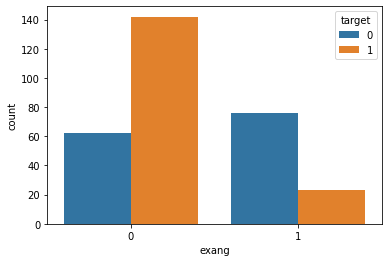

In [24]:
sns.countplot(data=data,x='exang',hue='target')

## Oldpeak
ST depression induced by exercise relative to rest (in mm, achieved by subtracting the lowest ST segment points during exercise and rest)

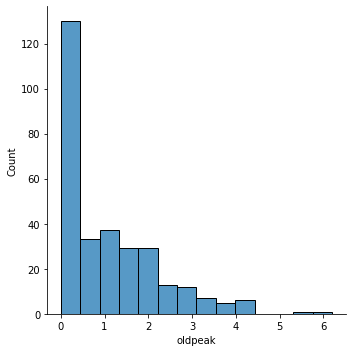

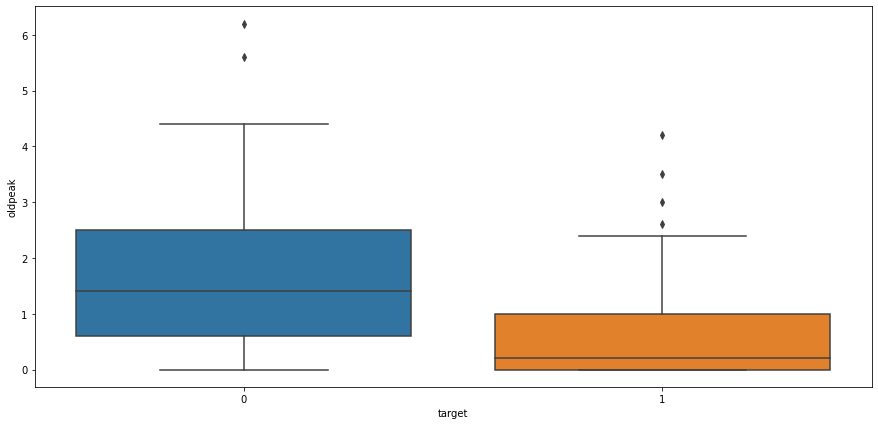

In [25]:
data['oldpeak'].nunique()
sns.displot(data['oldpeak'])
plt.figure(figsize=(15,7))
sns.boxplot(data=data,x='target',y='oldpeak')

In [26]:
data[data['oldpeak']>5]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
204,62,0,0,160,164,0,0,145,0,6.2,0,3,3,0
221,55,1,0,140,217,0,1,111,1,5.6,0,0,3,0


In [27]:
remove_data=data.index[data['oldpeak']>5].tolist()
index_dropped_rows.extend(remove_data)
index_dropped_rows

[223, 248, 85, 272, 204, 221]

## Slope
The slope of the peak exercise ST segment, ST-T abnormalities are considered to be a crucial indicator for identifying presence of ischaemia 
Value 1: upsloping 
Value 2: flat 
Value 3: downsloping 

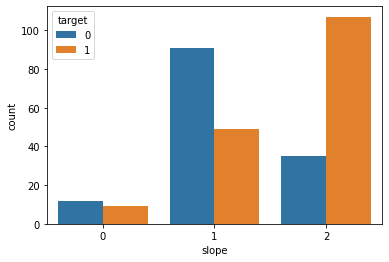

In [28]:
sns.countplot(data=data,x='slope',hue='target')

## Ca: number of major vessels (0-3) colored by fluoroscopy.
Major cardial vessels are as goes: aorta, superior vena cava, inferior vena cava, pulmonary artery (oxygen-poor blood --> lungs), pulmonary veins (oxygen-rich blood --> heart), and coronary arteries (supplies blood to heart tissue).

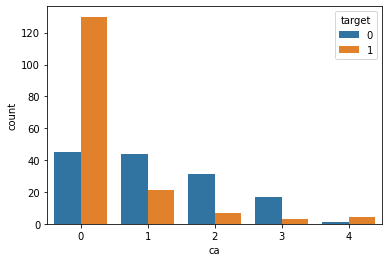

In [29]:
sns.countplot(data=data,x='ca',hue='target')

## AHD:
0 = normal; 1 = fixed defect (heart tissue can't absorb thallium both under stress and in rest); 2 = reversible defect (heart tissue is unable to absorb thallium only under the exercise portion of the test) 

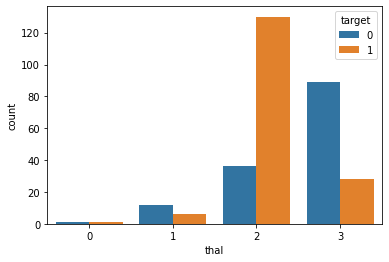

In [30]:
sns.countplot(data=data,x='thal',hue='target')

# Heatmap

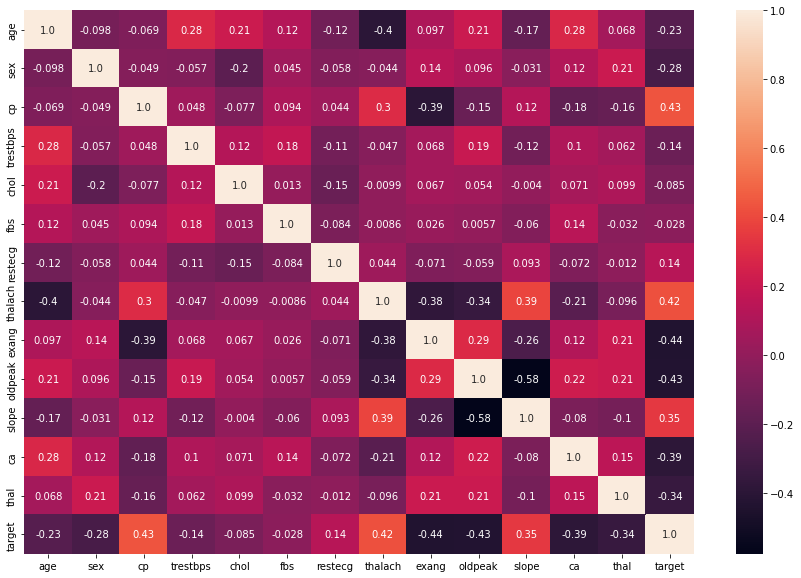

In [31]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(),annot=True,fmt='.2')
plt.show()

In [32]:
data.head(15)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


## One hot encoding for categorical Values

- **RestECG**: Resting electrocardiogram results 
    - 0: normal 
    - 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    - 2: showing probable or definite left ventricular hypertrophy by Estes' criteria 8.
- **Chest Pain type**
    - 1: typical angina (all criteria present) 
    - 2: atypical angina (two of three criteria satisfied)
    - 3: non-anginal pain (less than one criteria satisfied)
    - 4: asymptomatic (none of the criteria are satisfied)
- **Slope**: the slope of the peak exercise ST segment, ST-T abnormalities are considered to be a crucial indicator for identifying presence of ischaemia 
    - 1: upsloping
    - 2: flat
    - 3: downsloping
- **AHD**:
    - 0 = normal
    - 1 = fixed defect (heart tissue can't absorb thallium both under stress and in rest)
    - 2 = reversible defect (heart tissue is unable to absorb thallium only under the exercise portion of the test)

In [33]:
from sklearn.preprocessing import OneHotEncoder

In [34]:
## RestECG

enc = OneHotEncoder(sparse=False)

encodedValues = enc.fit_transform(data[["restecg"]])

encodedValues = pd.DataFrame({
    "RestECG normal" : encodedValues[:,0],
    "RestECG abnormal" : encodedValues[:,1],
    "RestECG ventricular hypertrophy" : encodedValues[:,2],
})

data = pd.concat([data,encodedValues], axis=1)

data.pop("restecg")

data.head()

,age,sex,cp,trestbps,chol,fbs,thalach,exang,oldpeak,slope,ca,thal,target,RestECG normal,RestECG abnormal,RestECG ventricular hypertrophy
0,63,1,3,145,233,1,150,0,2.3,0,0,1,1,1.0,0.0,0.0
1,37,1,2,130,250,0,187,0,3.5,0,0,2,1,0.0,1.0,0.0
2,41,0,1,130,204,0,172,0,1.4,2,0,2,1,1.0,0.0,0.0
3,56,1,1,120,236,0,178,0,0.8,2,0,2,1,0.0,1.0,0.0
4,57,0,0,120,354,0,163,1,0.6,2,0,2,1,0.0,1.0,0.0


In [35]:
encodedValues = enc.fit_transform(data[["cp"]])

encodedValues = pd.DataFrame({
    "Chest Pain typical angina" : encodedValues[:,0],
    "Chest Pain atypical angina" : encodedValues[:,1],
    "Chest Pain non-anginal pain" : encodedValues[:,2],
    "Chest Pain asymptomatic" : encodedValues[:,3],
})

data = pd.concat([data,encodedValues], axis=1)

data.pop("cp")

data.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,slope,ca,thal,target,RestECG normal,RestECG abnormal,RestECG ventricular hypertrophy,Chest Pain typical angina,Chest Pain atypical angina,Chest Pain non-anginal pain,Chest Pain asymptomatic
0,63,1,145,233,1,150,0,2.3,0,0,1,1,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,37,1,130,250,0,187,0,3.5,0,0,2,1,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,41,0,130,204,0,172,0,1.4,2,0,2,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,56,1,120,236,0,178,0,0.8,2,0,2,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,57,0,120,354,0,163,1,0.6,2,0,2,1,0.0,1.0,0.0,1.0,0.0,0.0,0.0


In [36]:
encodedValues = enc.fit_transform(data[["slope"]])

encodedValues = pd.DataFrame({
    "Slope Upscaling" : encodedValues[:,0],
    "Slope Flat" : encodedValues[:,1],
    "Slope Downscaling" : encodedValues[:,2]
})

data = pd.concat([data,encodedValues], axis=1)

data.pop("slope")

data.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,thal,target,RestECG normal,RestECG abnormal,RestECG ventricular hypertrophy,Chest Pain typical angina,Chest Pain atypical angina,Chest Pain non-anginal pain,Chest Pain asymptomatic,Slope Upscaling,Slope Flat,Slope Downscaling
0,63,1,145,233,1,150,0,2.3,0,1,1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1,37,1,130,250,0,187,0,3.5,0,2,1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,41,0,130,204,0,172,0,1.4,0,2,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,56,1,120,236,0,178,0,0.8,0,2,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,57,0,120,354,0,163,1,0.6,0,2,1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [37]:
encodedValues = enc.fit_transform(data[["thal"]])

encodedValues = pd.DataFrame({
    "AHD Normal" : encodedValues[:,0],
    "AHD Fixed Defect" : encodedValues[:,1],
    "AHD Reversible Defect" : encodedValues[:,2]
})

data = pd.concat([data,encodedValues], axis=1)

data.pop("thal")

data.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,target,RestECG normal,RestECG abnormal,RestECG ventricular hypertrophy,Chest Pain typical angina,Chest Pain atypical angina,Chest Pain non-anginal pain,Chest Pain asymptomatic,Slope Upscaling,Slope Flat,Slope Downscaling,AHD Normal,AHD Fixed Defect,AHD Reversible Defect
0,63,1,145,233,1,150,0,2.3,0,1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
1,37,1,130,250,0,187,0,3.5,0,1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,41,0,130,204,0,172,0,1.4,0,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,56,1,120,236,0,178,0,0.8,0,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,57,0,120,354,0,163,1,0.6,0,1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [38]:
#Removing outliers
data.drop(index=index_dropped_rows, inplace=True)

In [39]:
y = data.pop("target")
X = data

In [40]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [41]:
X.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,RestECG normal,RestECG abnormal,RestECG ventricular hypertrophy,Chest Pain typical angina,Chest Pain atypical angina,Chest Pain non-anginal pain,Chest Pain asymptomatic,Slope Upscaling,Slope Flat,Slope Downscaling,AHD Normal,AHD Fixed Defect,AHD Reversible Defect
0,63,1,145,233,1,150,0,2.3,0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
1,37,1,130,250,0,187,0,3.5,0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,41,0,130,204,0,172,0,1.4,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,56,1,120,236,0,178,0,0.8,0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,57,0,120,354,0,163,1,0.6,0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [42]:
# Ver los valores únicos de las columnas para determinar si los datos son numéricos o categóricos 
X.nunique()

age                                 41
sex                                  2
trestbps                            47
chol                               148
fbs                                  2
thalach                             89
exang                                2
oldpeak                             38
ca                                   5
RestECG normal                       2
RestECG abnormal                     2
RestECG ventricular hypertrophy      2
Chest Pain typical angina            2
Chest Pain atypical angina           2
Chest Pain non-anginal pain          2
Chest Pain asymptomatic              2
Slope Upscaling                      2
Slope Flat                           2
Slope Downscaling                    2
AHD Normal                           2
AHD Fixed Defect                     2
AHD Reversible Defect                2
dtype: int64

## We need to divide the categoric from the continuous values to standardize the numeric values, but not the categorical ones.

In [43]:
categoric = X.drop(["age", "trestbps", "chol", "thalach", "oldpeak", "ca"], axis=1)
categoric.head()

,sex,fbs,exang,RestECG normal,RestECG abnormal,RestECG ventricular hypertrophy,Chest Pain typical angina,Chest Pain atypical angina,Chest Pain non-anginal pain,Chest Pain asymptomatic,Slope Upscaling,Slope Flat,Slope Downscaling,AHD Normal,AHD Fixed Defect,AHD Reversible Defect
0,1,1,0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
1,1,0,0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0,0,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,1,0,0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0,0,1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [44]:
X = X[["age", "trestbps", "chol", "thalach", "oldpeak", "ca"]]
X.head()

,age,trestbps,chol,thalach,oldpeak,ca
0,63,145,233,150,2.3,0
1,37,130,250,187,3.5,0
2,41,130,204,172,1.4,0
3,56,120,236,178,0.8,0
4,57,120,354,163,0.6,0


In [45]:
featureTags = list(X.columns)
featureTags.extend(categoric.columns)
featureTags

['age',
 'trestbps',
 'chol',
 'thalach',
 'oldpeak',
 'ca',
 'sex',
 'fbs',
 'exang',
 'RestECG normal',
 'RestECG abnormal',
 'RestECG ventricular hypertrophy',
 'Chest Pain typical angina',
 'Chest Pain atypical angina',
 'Chest Pain non-anginal pain',
 'Chest Pain asymptomatic',
 'Slope Upscaling',
 'Slope Flat',
 'Slope Downscaling',
 'AHD Normal',
 'AHD Fixed Defect',
 'AHD Reversible Defect']

Now we standardize the continious values and append the categorical values to the new numpy array.

In [46]:
sc = StandardScaler()
X = sc.fit_transform(X)
X[:5]

array([[ 0.96298288,  0.82670223, -0.25424306,  0.00331517,  1.20042217,
        -0.71160071],
       [-1.89817673, -0.06939471,  0.09610443,  1.65924163,  2.30735739,
        -0.71160071],
       [-1.45799833, -0.06939471, -0.85189465,  0.98792009,  0.37022076,
        -0.71160071],
       [ 0.19267068, -0.66679267, -0.19241703,  1.25644871, -0.18324685,
        -0.71160071],
       [ 0.30271528, -0.66679267,  2.2394067 ,  0.58512717, -0.36773606,
        -0.71160071]])

In [47]:
categorical_array = categoric.to_numpy()
categorical_array[5:]

array([[1., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 1., 0., ..., 0., 0., 0.],
       [1., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [48]:
new_X = np.concatenate((X,categorical_array), axis=1)
new_X[5:]

array([[ 0.30271528,  0.52800325, -1.09919876, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.19267068,  0.52800325,  1.00288616, ...,  0.        ,
         0.        ,  1.        ],
       [-1.12786452, -0.66679267,  0.36401721, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 1.51320589,  0.76696243, -1.07859008, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.30271528, -0.06939471, -2.35632797, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.30271528, -0.06939471, -0.19241703, ...,  0.        ,
         0.        ,  1.        ]])

In [49]:
X[0]

array([ 0.96298288,  0.82670223, -0.25424306,  0.00331517,  1.20042217,
       -0.71160071])

In [50]:
new_X[0]

array([ 0.96298288,  0.82670223, -0.25424306,  0.00331517,  1.20042217,
       -0.71160071,  1.        ,  1.        ,  0.        ,  1.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        1.        ,  1.        ,  0.        ,  0.        ,  0.        ,
        1.        ,  0.        ])

In [51]:
for feature, val in zip(featureTags, new_X[0]):
    print(f"Feature {feature}\t\t-> {val}")

Feature age		-> 0.9629828845018945
Feature trestbps		-> 0.8267022296292442
Feature chol		-> -0.2542430559558268
Feature thalach		-> 0.0033151680940168805
Feature oldpeak		-> 1.2004221732162654
Feature ca		-> -0.7116007074895543
Feature sex		-> 1.0
Feature fbs		-> 1.0
Feature exang		-> 0.0
Feature RestECG normal		-> 1.0
Feature RestECG abnormal		-> 0.0
Feature RestECG ventricular hypertrophy		-> 0.0
Feature Chest Pain typical angina		-> 0.0
Feature Chest Pain atypical angina		-> 0.0
Feature Chest Pain non-anginal pain		-> 0.0
Feature Chest Pain asymptomatic		-> 1.0
Feature Slope Upscaling		-> 1.0
Feature Slope Flat		-> 0.0
Feature Slope Downscaling		-> 0.0
Feature AHD Normal		-> 0.0
Feature AHD Fixed Defect		-> 1.0
Feature AHD Reversible Defect		-> 0.0


### Dividing into the Training & Test Sets

In [52]:
X_train, X_test, y_train, y_test = train_test_split(new_X, y, test_size=0.2, random_state=42)

In [53]:
print(f"Total number of data is {len(y_train) + len(y_test)}")

print(f"Cantidad de positivos datos en y_train\t= {len(y_train[y_train == 1])}")
print(f"Cantidad de positivos datos en y_test \t= {len(y_test[y_test == 1])}")
print(f"Cantidad de negativos datos en y_train\t= {len(y_train[y_train == 0])}")
print(f"Cantidad de negativos datos en y_test \t= {len(y_test[y_test == 0])}")

Total number of data is 297
Cantidad de positivos datos en y_train	= 130
Cantidad de positivos datos en y_test 	= 34
Cantidad de negativos datos en y_train	= 107
Cantidad de negativos datos en y_test 	= 26


In [54]:
print(f"Ratio of negatives over positives is {(len(y_train[y_train == 1])/len(y_train))*100}%")
print(f"Ratio of negatives over positives is {(len(y_test[y_test == 1])/len(y_test))*100}%")

Ratio of negatives over positives is 54.85232067510548%
Ratio of negatives over positives is 56.666666666666664%


# Random Forest

In [55]:
from sklearn.ensemble import RandomForestClassifier

__RF_ESTIMATORS = 100

# Instantiate model with 1000 decision trees
cl = RandomForestClassifier(n_estimators = __RF_ESTIMATORS, random_state = 42)

# Train the model on training data
cl.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [56]:
# Use the forest's predict method on the test data
predictions = cl.predict(X_test)

In [57]:
print('Training accuracy is:',cl.score(X_train, y_train))
print('Testing accuracy is:',cl.score(X_test, y_test))

Training accuracy is: 1.0
Testing accuracy is: 0.85


In [58]:
# cm = confusion_matrix(y_test, predictions)

In [59]:
# disp = ConfusionMatrixDisplay(confusion_matrix=cm)
# disp.plot()
# plt.show()

In [60]:
# Librerias Evaluación
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay
import itertools 

def plot_confusion_matrix(cm, classes, normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """"
    This function prints and plots the confusion matrix.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
        
    print(cm)
    
    thresh = cm.max() /2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j,i, cm[i,j],
                horizontalalignment="center",
                color="white" if cm[i,j] > thresh else "black")
        
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

RANDOM FOREST
              precision    recall  f1-score   support

           0       0.87      0.77      0.82        26
           1       0.84      0.91      0.87        34

    accuracy                           0.85        60
   macro avg       0.85      0.84      0.84        60
weighted avg       0.85      0.85      0.85        60

Confusion matrix, without normalization
[[20  6]
 [ 3 31]]


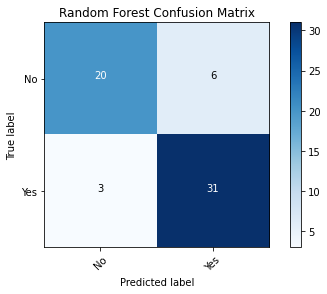

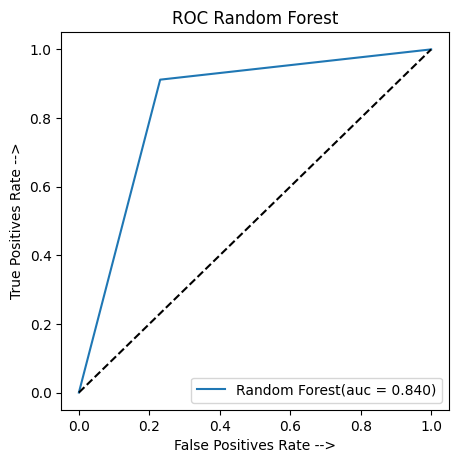

In [61]:
# Classification Report
print('RANDOM FOREST')
print(classification_report(y_test, predictions))

# Confusion Matrix
cm_rf = confusion_matrix(y_test, predictions)
cm_plot_labels = ['No', 'Yes']
plot_confusion_matrix(cm=cm_rf, classes=cm_plot_labels, title='Random Forest Confusion Matrix')

# ROC
rf_fpr, rf_tpr, threshold = roc_curve(y_test, predictions)
rf_auc = auc(rf_fpr, rf_tpr) 
plt.figure(figsize=(5,5), dpi=100)
plt.plot(rf_fpr, rf_tpr, linestyle='-', label='Random Forest(auc = %0.3f)'%rf_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.title("ROC Random Forest")
plt.xlabel('False Positives Rate -->')
plt.ylabel('True Positives Rate -->')
plt.legend()
plt.show()

## Tuning Random Forest


Testing accuracy with max_features = 1 and max_depth = 2: 0.833
Testing accuracy with max_features = 1 and max_depth = 3: 0.867
Testing accuracy with max_features = 1 and max_depth = 5: 0.883


Best result obtained->> max_features = 1 and max_depth = 5: 0.8833333333333333
RANDOM FOREST
              precision    recall  f1-score   support

           0       0.91      0.81      0.86        26
           1       0.86      0.94      0.90        34

    accuracy                           0.88        60
   macro avg       0.89      0.87      0.88        60
weighted avg       0.89      0.88      0.88        60

Confusion matrix, without normalization
[[21  5]
 [ 2 32]]


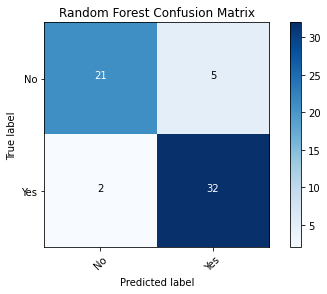

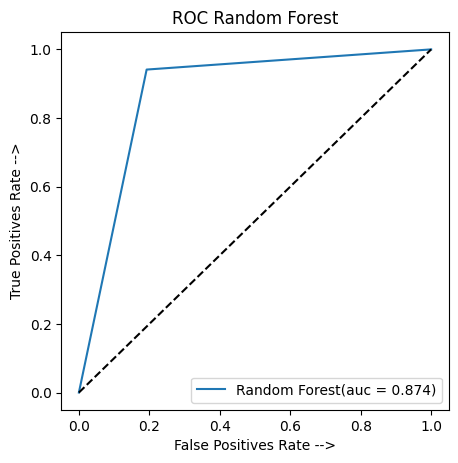

In [74]:
from itertools import product

bestResult = ("a","b",0)
bestCm = None
bestPredictions = None

max_features = [1, 2, 3, 4, 5, 'sqrt', 'log2']
max_depths = list(range(2,10))

for f, d in product(max_features, max_depths):
    cl = RandomForestClassifier(n_estimators=__RF_ESTIMATORS,
                             criterion='entropy',
                             max_features=f,
                             max_depth=d,
                             n_jobs=4,
                             random_state=1337
                            )
    cl.fit(X_train, y_train)
    prediction_test = cl.predict(X=X_test)
    test_accuracy = accuracy_score(y_test, prediction_test)
    if(bestResult[2] < test_accuracy):
        bestResult = (f,d,test_accuracy)
        bestPredictions = prediction_test
        print('Testing accuracy with max_features = {} and max_depth = {}: {:.3f}'.format(f, d, test_accuracy))
        # bestCm = confusion_matrix(y_test, prediction_test)
        
print(f"\n\nBest result obtained->> max_features = {bestResult[0]} and max_depth = {bestResult[1]}: {bestResult[2]}")
# disp = ConfusionMatrixDisplay(bestCm)
# disp.plot()
# plt.show()

# Classification Report
print('RANDOM FOREST')
print(classification_report(y_test, bestPredictions))

# Confusion Matrix
cm_rf = confusion_matrix(y_test, bestPredictions)
cm_plot_labels = ['No', 'Yes']
plot_confusion_matrix(cm=cm_rf, classes=cm_plot_labels, title='Random Forest Confusion Matrix')

# ROC
rf_fpr, rf_tpr, threshold = roc_curve(y_test, bestPredictions)
rf_auc = auc(rf_fpr, rf_tpr) 
plt.figure(figsize=(5,5), dpi=100)
plt.plot(rf_fpr, rf_tpr, linestyle='-', label='Random Forest(auc = %0.3f)'%rf_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.title("ROC Random Forest")
plt.xlabel('False Positives Rate -->')
plt.ylabel('True Positives Rate -->')
plt.legend()
plt.show()

In [75]:
modelCoeff = list(cl.feature_importances_)
for tag, val in zip(featureTags, modelCoeff):
    print(f"Feature {tag} importance\t -->\t{'{0:.4f}'.format(val)}")

Feature age importance	 -->	0.0888
Feature trestbps importance	 -->	0.0756
Feature chol importance	 -->	0.0709
Feature thalach importance	 -->	0.1158
Feature oldpeak importance	 -->	0.1008
Feature ca importance	 -->	0.1118
Feature sex importance	 -->	0.0288
Feature fbs importance	 -->	0.0113
Feature exang importance	 -->	0.0608
Feature RestECG normal importance	 -->	0.0178
Feature RestECG abnormal importance	 -->	0.0173
Feature RestECG ventricular hypertrophy importance	 -->	0.0011
Feature Chest Pain typical angina importance	 -->	0.0791
Feature Chest Pain atypical angina importance	 -->	0.0114
Feature Chest Pain non-anginal pain importance	 -->	0.0265
Feature Chest Pain asymptomatic importance	 -->	0.0118
Feature Slope Upscaling importance	 -->	0.0052
Feature Slope Flat importance	 -->	0.0198
Feature Slope Downscaling importance	 -->	0.0316
Feature AHD Normal importance	 -->	0.0003
Feature AHD Fixed Defect importance	 -->	0.0073
Feature AHD Reversible Defect importance	 -->	0.1064


In [76]:
absoluteImportance = list((abs(val) for val in modelCoeff))

print(f"The most  important feature according to the Regression Model is {featureTags[absoluteImportance.index(max(absoluteImportance))]}")
print(f"The least important feature according to the Regression Model is {featureTags[absoluteImportance.index(min(absoluteImportance))]}")

The most  important feature according to the Regression Model is thalach
The least important feature according to the Regression Model is AHD Normal


This graph tries to plot how much value each feature contributes to the output of the model.

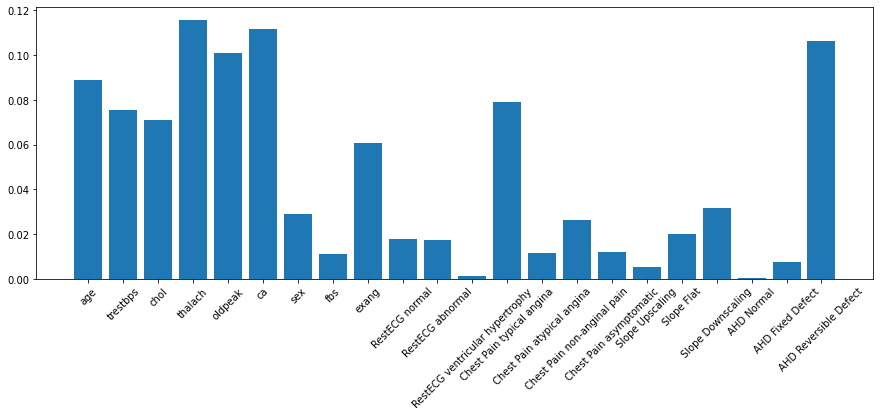

In [77]:
plt.figure(figsize=(15,5))
plt.xticks(rotation=45)
plt.bar(featureTags, modelCoeff)
plt.show()

## Plot the first features of the tree

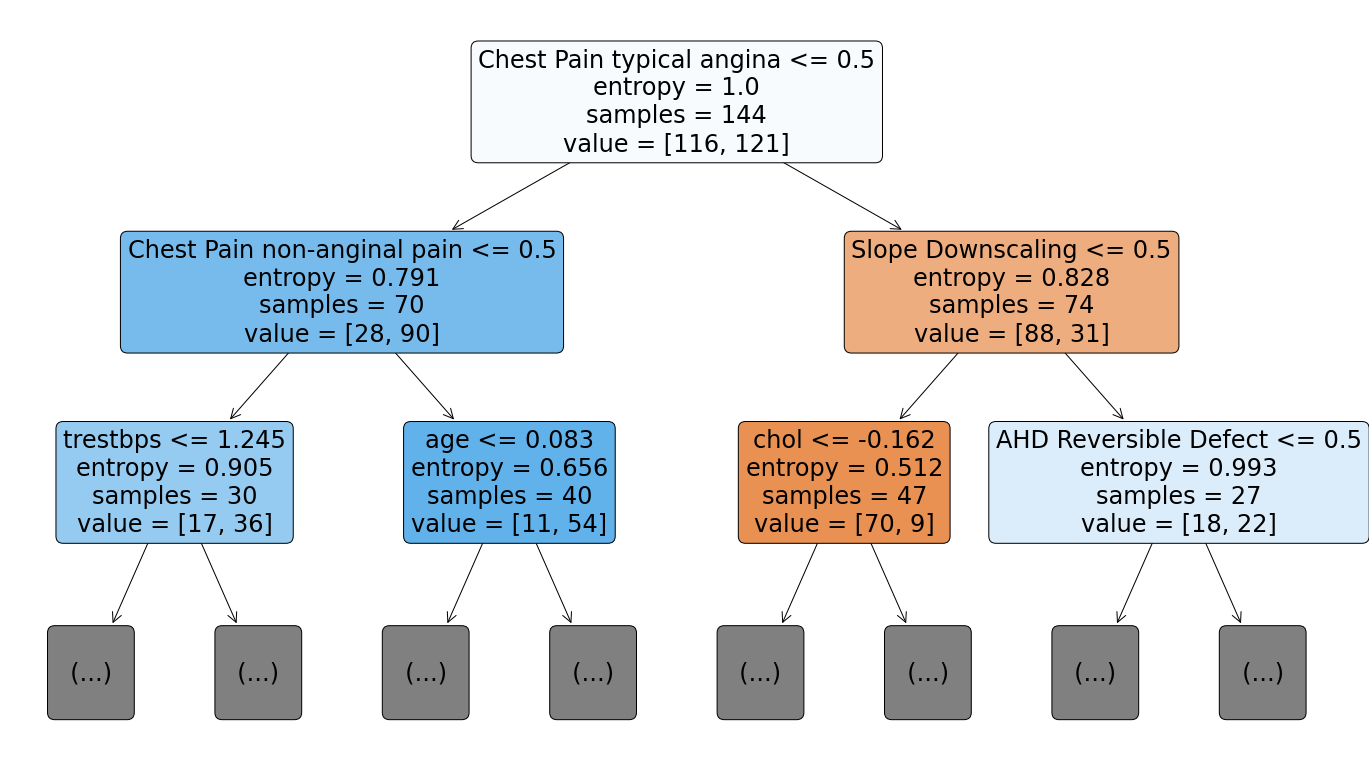

In [78]:
from sklearn.tree import plot_tree

fig = plt.figure(figsize=(24, 14))
plot_tree(cl.estimators_[0], 
          feature_names=featureTags,
          filled=True, impurity=True,
          max_depth=2,
          fontsize=24,
          rounded=True)

plt.show()

## Saving the full tree to a separate file

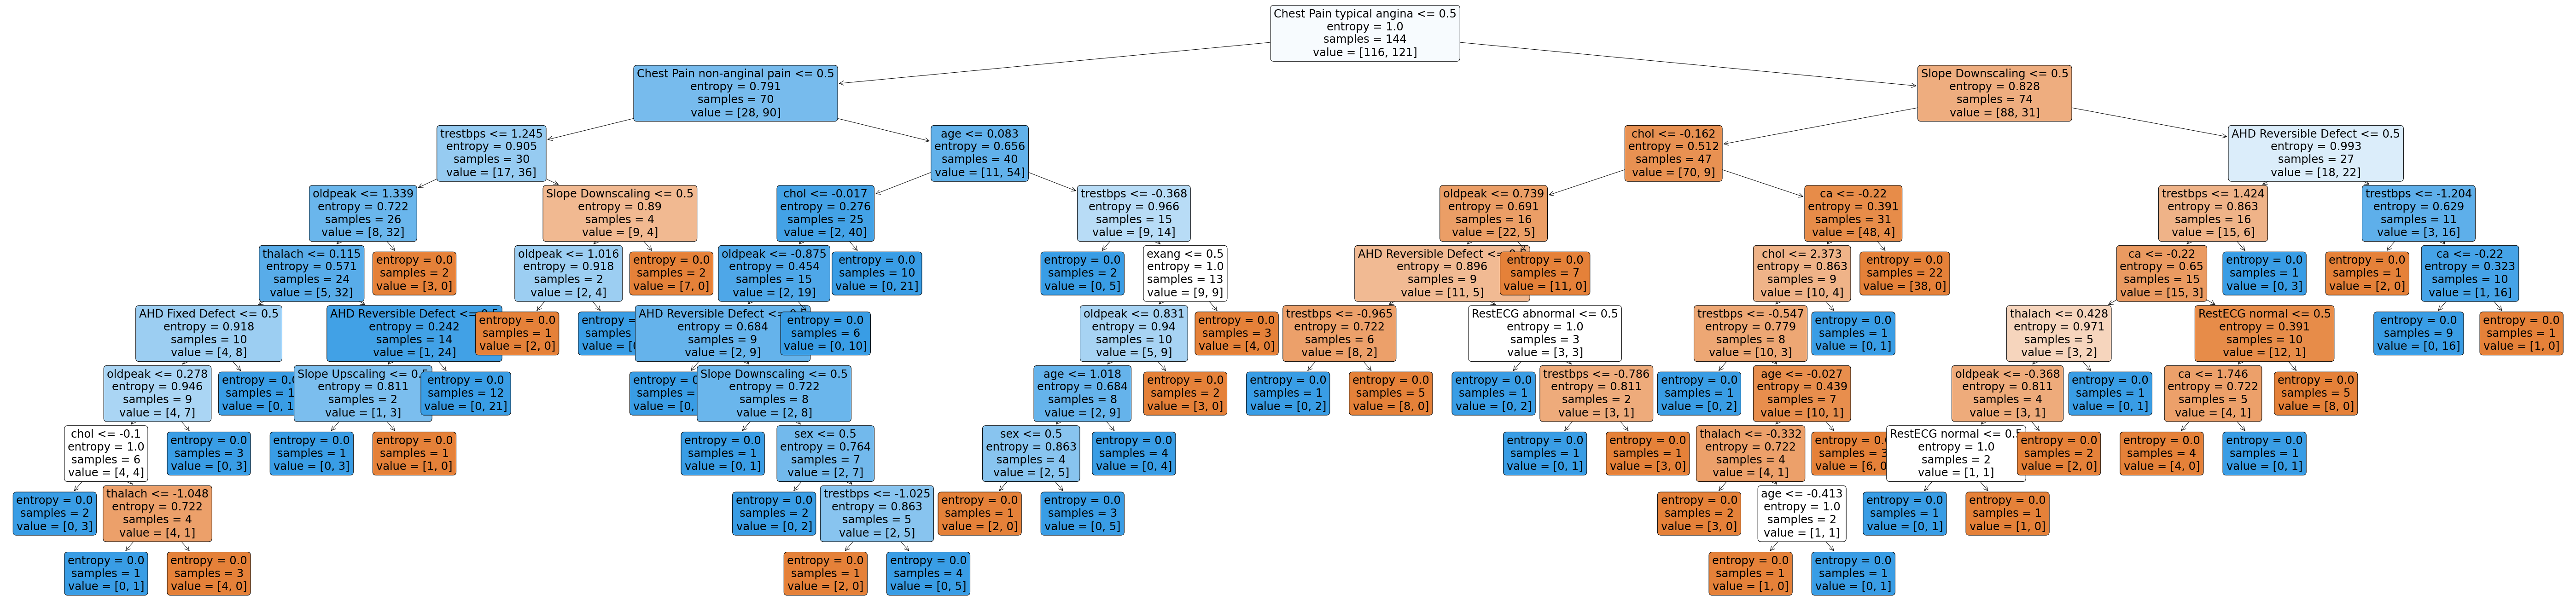

In [80]:
from sklearn.tree import plot_tree

fig = plt.figure(figsize=(100, 24))
plot_tree(cl.estimators_[0], 
          feature_names=featureTags,
          filled=True, impurity=True,
          fontsize=24,
          rounded=True)

fig.savefig("results/rf.png")

## This png can be found in the imageFile results/rf.png